In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter

In [2]:
dfLiwc = pd.read_csv('data/liwccamoes.csv', index_col=0,sep=";")

In [3]:
dfTags = pd.read_csv('data/tagscamoes.csv', index_col=0)

In [5]:
dfTags.iloc[:,3:82]

,ADJ,ADV,CARD,CJ,CL,CN,DA,DEM,DFR,DGT,...,PREPDEM,PRS,QNT,REL,STT,SYB,UM,V,VAUX,WD
1,579,292,17,312,213,1434,1089,25,0,44,...,0,73,32,156,12,0,2,779,0,0
2,466,422,12,498,317,1598,967,58,0,3,...,0,93,72,191,2,0,169,1078,8,0
3,530,394,18,497,214,1601,995,95,0,69,...,0,55,61,191,14,13,131,865,3,0
4,338,450,3,476,357,1565,552,28,0,28,...,0,207,70,140,6,0,127,1060,0,6
5,647,276,19,506,163,1741,1258,76,0,29,...,0,89,63,213,5,9,99,679,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,504,541,68,421,327,1321,367,159,0,307,...,0,230,59,233,5,0,25,1170,2,8
192,337,622,14,528,322,1105,374,125,0,419,...,0,249,46,191,7,0,14,1167,2,0
193,411,514,21,478,232,1745,1234,67,0,20,...,0,211,63,126,4,0,107,1029,6,4
194,338,455,41,391,150,2008,1132,76,0,10,...,0,161,46,162,6,3,89,904,18,0


In [7]:
df1 = pd.concat([dfLiwc, dfTags.iloc[:,3:82]], axis=1)
df1

,titulo,autor,ano,genero,achieve,adverb,affect,anger,anx,article,...,PREPDEM,PRS,QNT,REL,STT,SYB,UM,V,VAUX,WD
1,A virtude laureada,Manoel Maria de Barbosa du Bocage,1805,Drama,70,67,663,100,84,554,...,0,73,32,156,12,0,2,779,0,0
2,Os Pobres,Raul Brandão,1906,Novel,74,177,603,99,63,789,...,0,93,72,191,2,0,169,1078,8,0
3,Raios de extincta luz,Antero de Quental,1892,Poetry,91,152,596,75,44,636,...,0,55,61,191,14,13,131,865,3,0
4,Dispersão,Mário Sá-Carneiro,1914,Petry,113,131,538,70,64,366,...,0,207,70,140,6,0,127,1060,0,6
5,Cantos Sagrados,Manuel de Arriaga,1899,Poetry,90,149,568,58,30,684,...,0,89,63,213,5,9,99,679,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Auto da Índia,Gil Vicente,1509,Drama,112,207,465,114,27,199,...,0,230,59,233,5,0,25,1170,2,8
192,Farsa de Inês Pereira,Gil Vicente,1523,Drama,82,185,500,80,20,254,...,0,249,46,191,7,0,14,1167,2,0
193,A Cidade e a Infância,Luandino Vieira,1960,Tale,114,208,549,71,49,674,...,0,211,63,126,4,0,107,1029,6,4
194,KAPAPA,JOSÉ LUANDINO VIEIRA,1998,Novel,107,198,529,74,40,594,...,0,161,46,162,6,3,89,904,18,0


In [8]:
y = df1.iloc[:,3].values

In [9]:
for x in Counter(y).most_common():
  print(x)

('Tale', 93)
('Novel', 25)
('Short story', 20)
('Chronicle', 16)
('Poetry', 13)
('Drama', 9)
('Essay', 8)
('Poem', 3)
('Petry', 1)
('Other', 1)
('Anthology', 1)
('Narrative', 1)
('Letter', 1)
('Memoirs', 1)
('Script', 1)
('Allegory', 1)


## Filtrando dados

In [10]:
df = df1[df1.genero.isin(["Tale", "Novel", "Short story", "Chronicle", "Poetry"])]

In [11]:
X = df.iloc[:,4:147].values
y = df.iloc[:,3].values

In [12]:
X

array([[  74,  177,  603, ..., 1078,    8,    0],
       [  91,  152,  596, ...,  865,    3,    0],
       [  90,  149,  568, ...,  679,    3,    1],
       ...,
       [ 155,  330,  672, ..., 1025,   18,    2],
       [ 114,  208,  549, ..., 1029,    6,    4],
       [ 107,  198,  529, ...,  904,   18,    0]])

In [13]:
for x in Counter(y).most_common():
  print(x)

('Tale', 93)
('Novel', 25)
('Short story', 20)
('Chronicle', 16)
('Poetry', 13)


## Machine Learning: Random Forests

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Chronicle       1.00      0.33      0.50         3
       Novel       0.33      0.20      0.25         5
      Poetry       0.75      1.00      0.86         3
 Short story       1.00      0.25      0.40         4
        Tale       0.68      0.89      0.77        19

    accuracy                           0.68        34
   macro avg       0.75      0.54      0.56        34
weighted avg       0.70      0.68      0.64        34



## Random Forests Hyperparameter tuning

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [16]:
le = preprocessing.LabelEncoder()
rf = RandomForestClassifier(random_state = 42)

In [17]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
              }
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [18]:
rf_random = GridSearchCV(
    estimator = rf, 
    param_grid = random_grid, 
    cv = 3, 
    verbose=1, 
    n_jobs = -1,
    scoring='f1_micro'
)

In [19]:
# Fit the random search model
rf_random.fit(X, y)

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400,
                                          1600, 1800, 2000]},
             scoring='f1_micro', verbose=1)

In [20]:
rf_random.best_score_

0.6528138528138528

In [21]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

### Using best parameters

In [22]:
classifier = RandomForestClassifier(
    bootstrap=False,
    max_depth=10,
    max_features='auto',
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=200, 
    random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Chronicle       1.00      0.33      0.50         3
       Novel       0.50      0.20      0.29         5
      Poetry       0.75      1.00      0.86         3
 Short story       1.00      0.25      0.40         4
        Tale       0.69      0.95      0.80        19

    accuracy                           0.71        34
   macro avg       0.79      0.55      0.57        34
weighted avg       0.73      0.71      0.66        34



In [23]:
from sklearn.model_selection import cross_validate

In [24]:
scores = cross_validate(classifier, X, y, cv=5, scoring=['f1_micro', 'precision_micro', 'recall_micro'])

In [25]:
print(scores)

{'fit_time': array([0.47954822, 0.3854723 , 0.34282112, 0.34533501, 0.34871197]), 'score_time': array([0.04356432, 0.03093505, 0.03066921, 0.03118992, 0.03088164]), 'test_f1_micro': array([0.73529412, 0.67647059, 0.57575758, 0.72727273, 0.63636364]), 'test_precision_micro': array([0.73529412, 0.67647059, 0.57575758, 0.72727273, 0.63636364]), 'test_recall_micro': array([0.73529412, 0.67647059, 0.57575758, 0.72727273, 0.63636364])}


In [26]:
print("%0.2f f1 micro desvio: %0.2f" % (scores['test_f1_micro'].mean(), scores['test_f1_micro'].std()))
print("%0.2f prec micro desvio: %0.2f" % (scores['test_precision_micro'].mean(), scores['test_precision_micro'].std()))
print("%0.2f rec micro desvio: %0.2f" % (scores['test_recall_micro'].mean(), scores['test_recall_micro'].std()))

0.67 f1 micro desvio: 0.06
0.67 prec micro desvio: 0.06
0.67 rec micro desvio: 0.06


In [31]:
# features names
fn = list(df.columns[4:])

In [32]:
len(fn)

142

In [33]:
# class names
cn = []
for x in y:
  if x not in cn:
    cn.append(x)

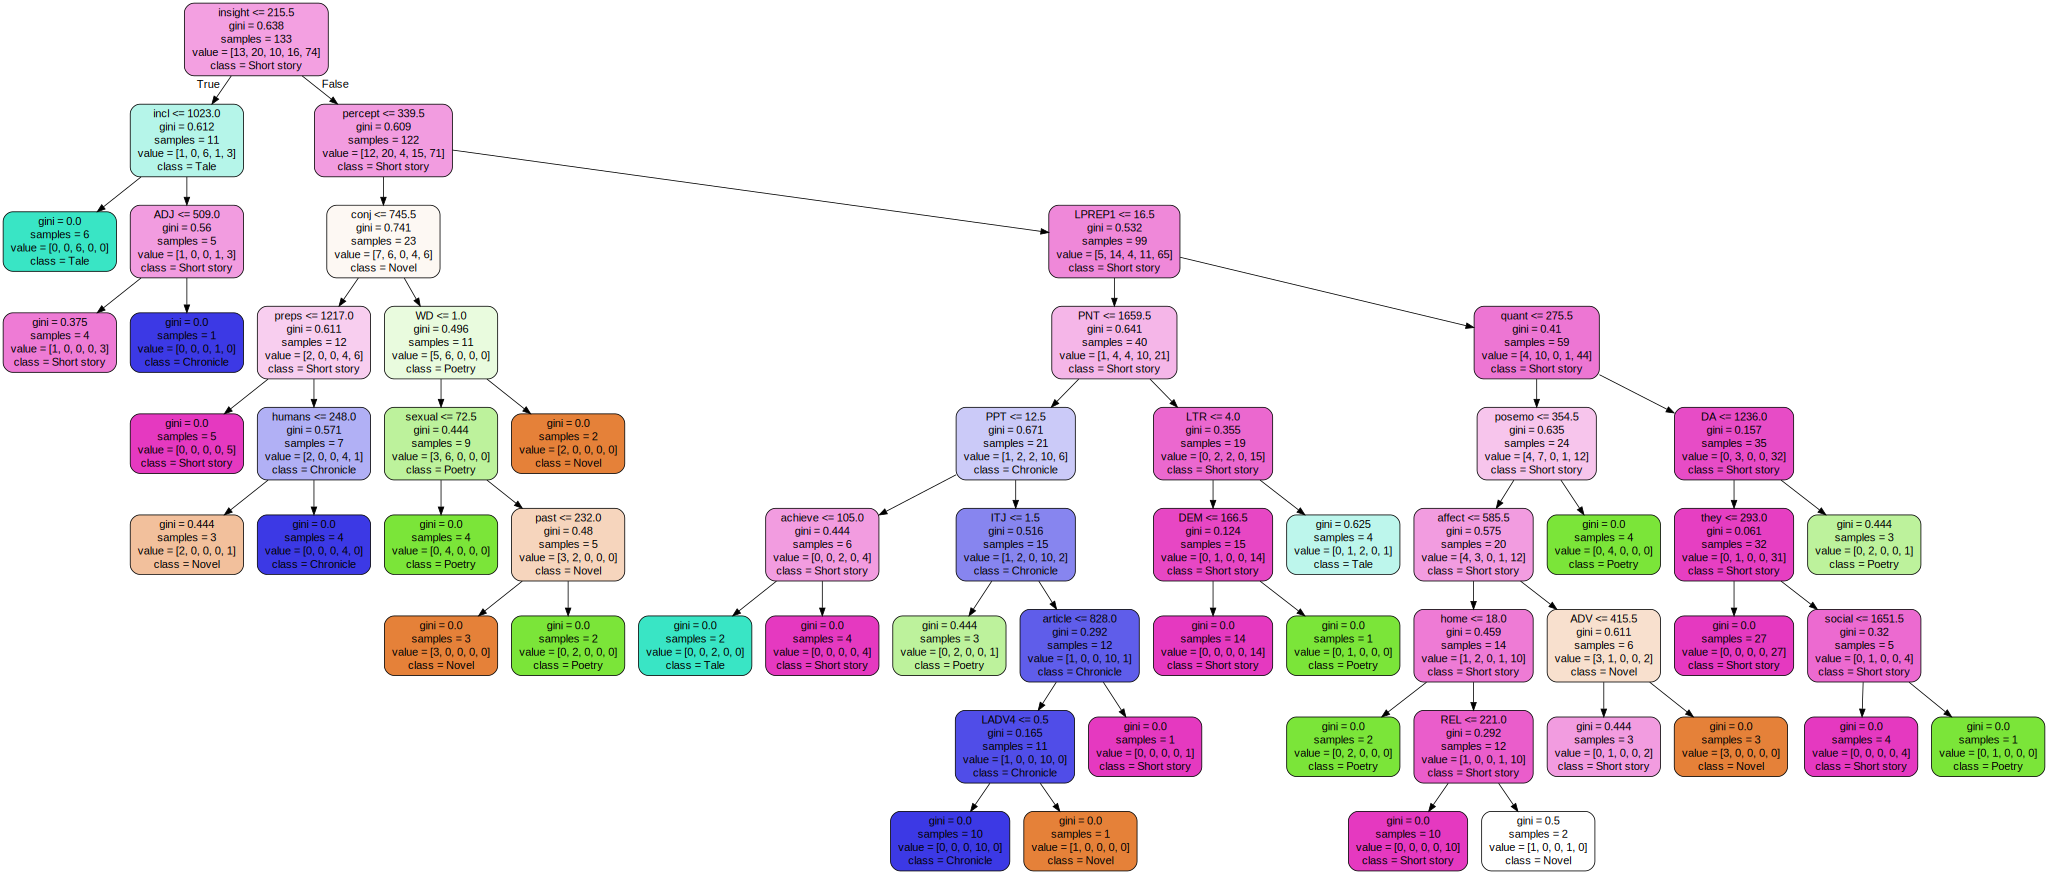

In [35]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(classifier.estimators_[0], 
                           feature_names=fn,
                           class_names=cn, 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph